# Introducción al Procesamiento de Imágenes
## Sampling & Fourier Transform 

### Import libraries

In [9]:
#conda install -c anaconda scikit-image
#conda install -c anaconda scipy
#conda install -c anaconda pillow
#pip install --upgrade --force-reinstall scipy



In [5]:
%matplotlib inline 

from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
#from scipy.stats import signaltonoise
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

In [6]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

### Up-Sampling

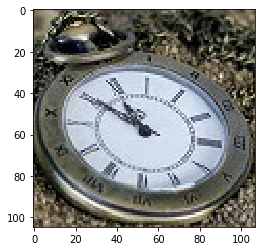

(107, 105)


In [7]:
im = Image.open("../images/clock.jpg") # the original small clock image
pylab.imshow(im), pylab.show()
print(im.size)

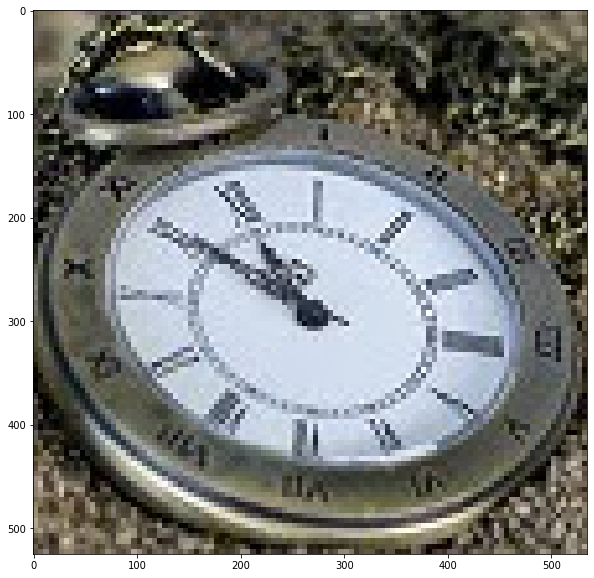

(<Figure size 720x720 with 1 Axes>,
 None)

In [8]:
im1 = im.resize((im.width*5, im.height*5), Image.NEAREST) # nearest neighbor interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

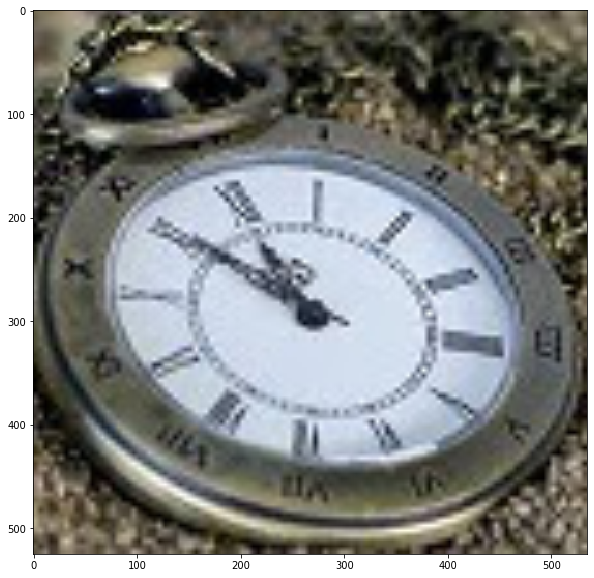

(<Figure size 720x720 with 1 Axes>,
 None)

In [9]:
im1 = im.resize((im.width*5, im.height*5), Image.BILINEAR) # up-sample with bi-linear interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

TypeError: Image data of dtype object cannot be converted to float

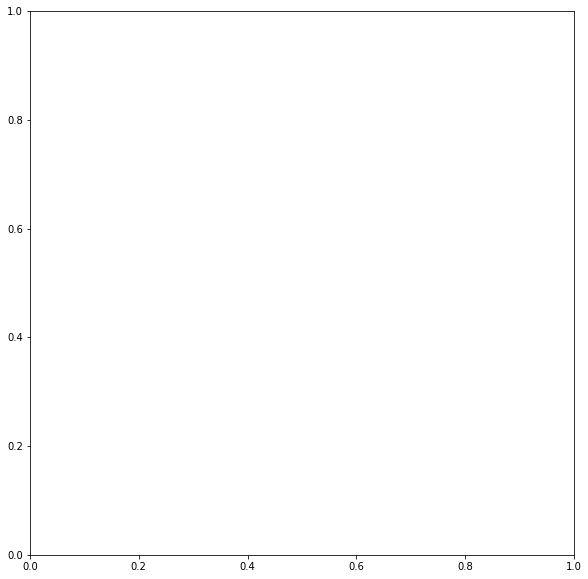

In [18]:
im1 = im.resize((im.width*10, im.height*10), Image.BICUBIC).show() # bi-cubic interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

### Down-sampling

(1498, 927)


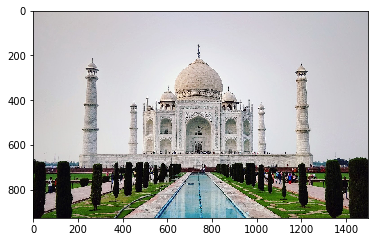

In [22]:
im = Image.open("../images/tajmahal.jpg")
pylab.imshow(im)
print(im.size)

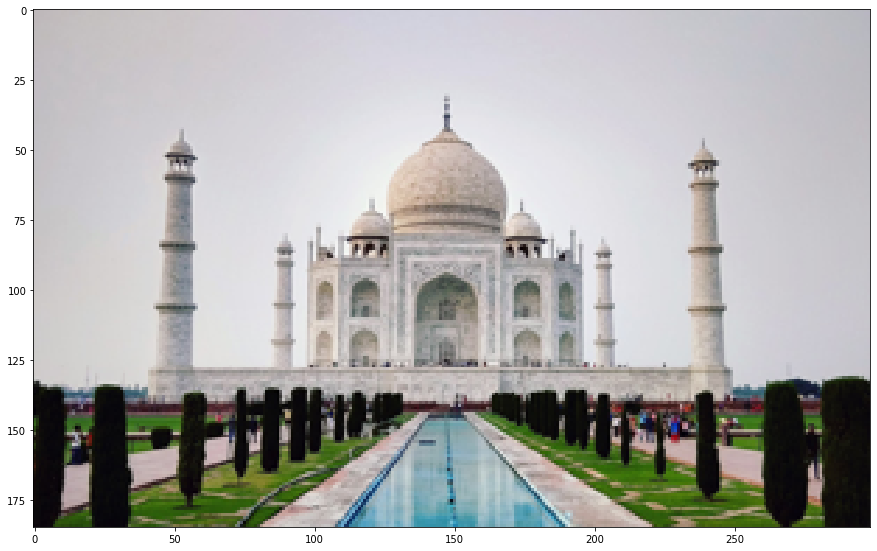

(299, 185)


In [23]:
im = im.resize((im.width//5, im.height//5))
pylab.figure(figsize=(15,10)), pylab.imshow(im), pylab.show()
print(im.size)

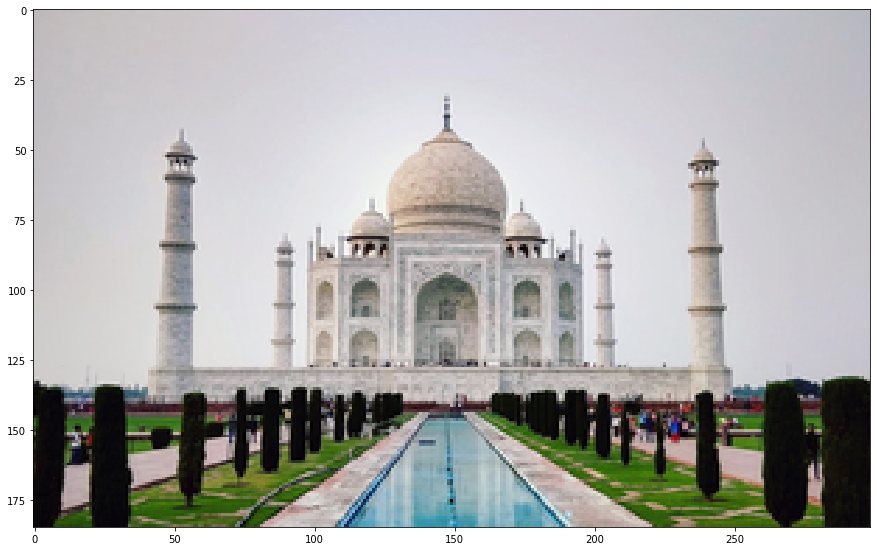

(<Figure size 1080x720 with 1 Axes>,
 None)

In [24]:
im = Image.open("../images/tajmahal.jpg")
im = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)
pylab.figure(figsize=(15,10)), pylab.imshow(im), pylab.show()

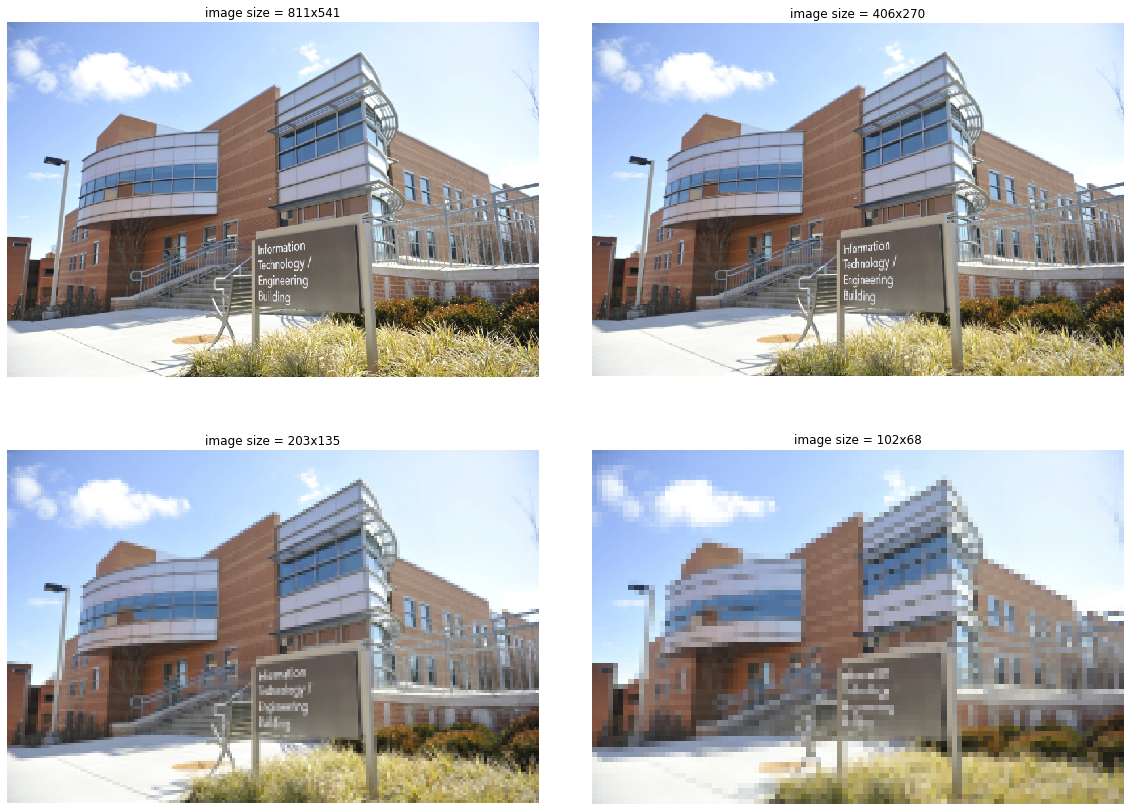

In [27]:
im = imread('../images/umbc.png')
im1 = im.copy()
pylab.figure(figsize=(20,15))
for i in range(4):
    pylab.subplot(2,2,i+1), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('image size = ' + str(im1.shape[1]) + 'x' + str(im1.shape[0]))
    im1 = rescale(im1, scale = 0.5, multichannel=True, anti_aliasing=False)
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

In [21]:
im1 = rescale(im1, scale = 0.5, multichannel=True, anti_aliasing=True)

### Quantizing with PIL

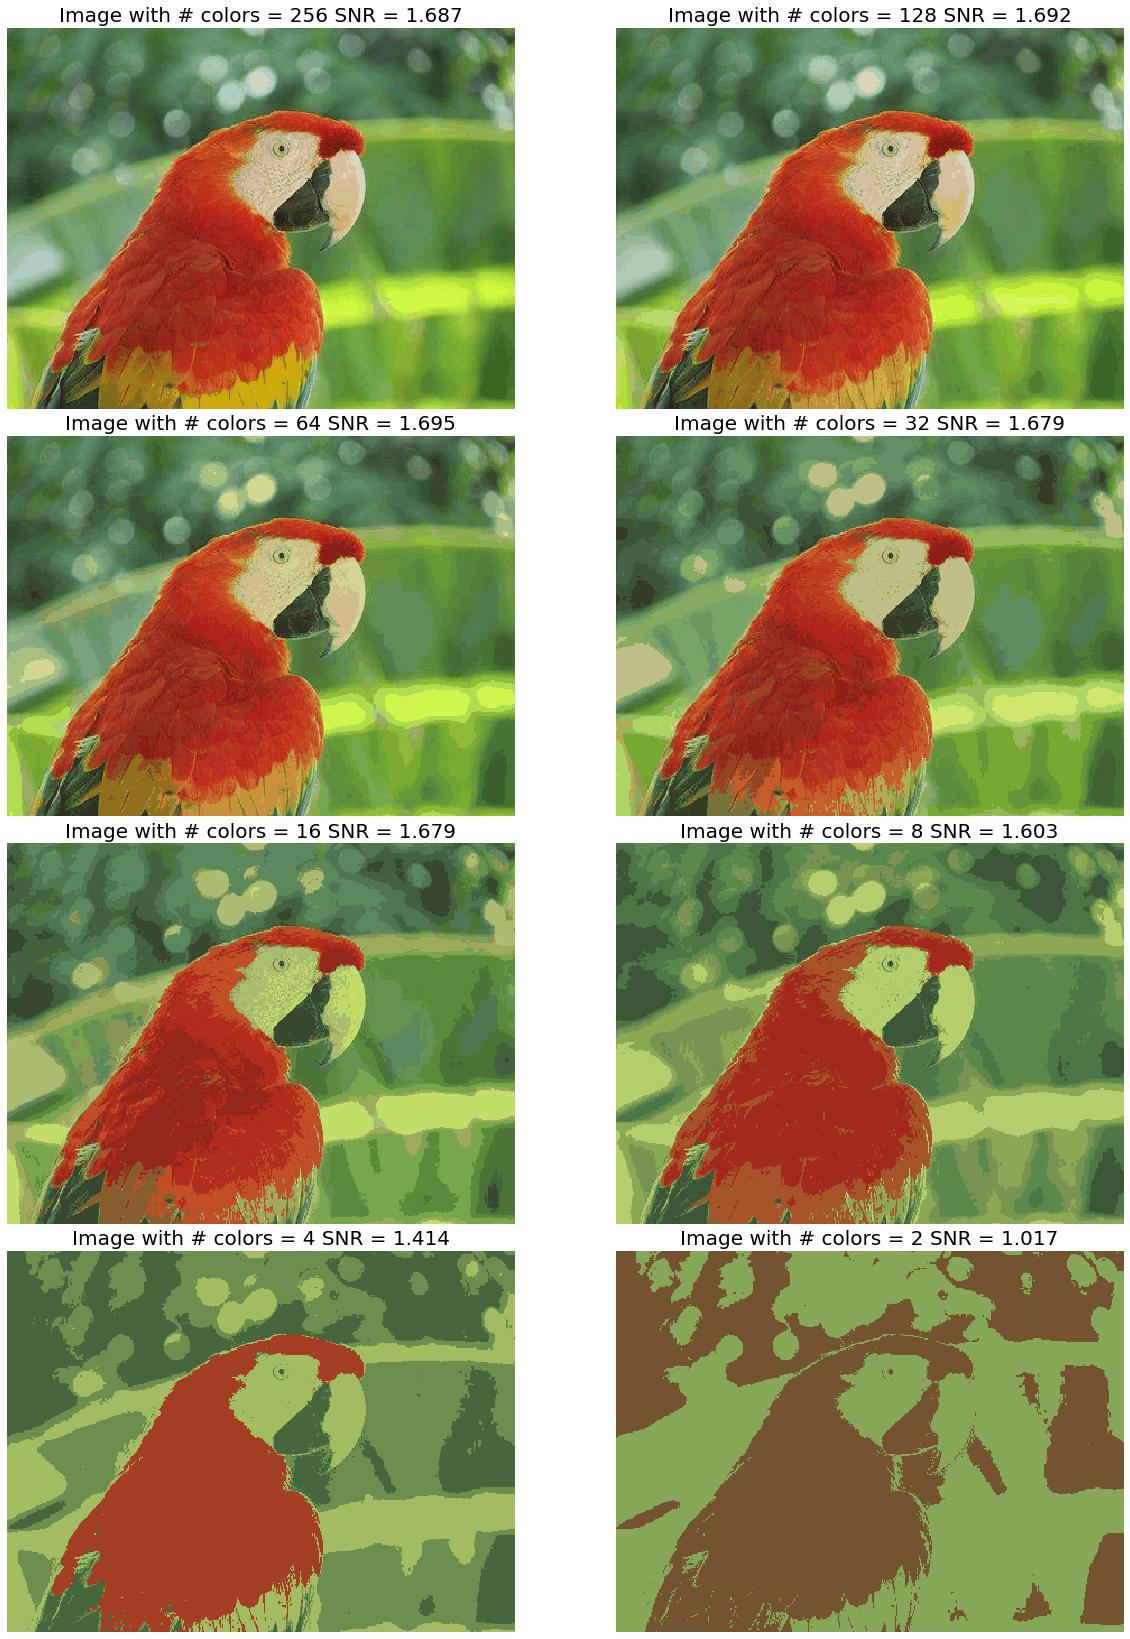

In [30]:
im = Image.open('../images/parrot.jpg')
pylab.figure(figsize=(20,30))
num_colors_list = [1 << n for n in range(8,0,-1)]
snr_list = []
i = 1
for num_colors in num_colors_list:
    im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    pylab.subplot(4,2,i), pylab.imshow(im1), pylab.axis('off')
    snr_list.append(signaltonoise(im1, axis=None))
    pylab.title('Image with # colors = ' + str(num_colors) + ' SNR = ' +
    str(np.round(snr_list[i-1],3)), size=20)
    i += 1
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

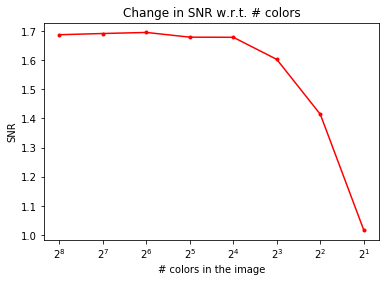

In [31]:
pylab.plot(num_colors_list, snr_list, 'r.-')
pylab.xlabel('# colors in the image')
pylab.ylabel('SNR')
pylab.title('Change in SNR w.r.t. # colors')
pylab.xscale('log', basex=2)
pylab.gca().invert_xaxis()
pylab.show()

### FFT with the scipy.fftpack module

In [ ]:
im = np.array(Image.open('../images/rhino.jpg').convert('L')) # we shall work with grayscale image
snr = signaltonoise(im, axis=None)
print('SNR for the original image = ' + str(snr))
# SNR for the original image = 2.023722773801701
# now call FFT and IFFT
freq = fp.fft2(im)
im1 = fp.ifft2(freq).real
snr = signaltonoise(im1, axis=None)
print('SNR for the image obtained after reconstruction = ' + str(snr))
# SNR for the image obtained after reconstruction = 2.0237227738013224
assert(np.allclose(im, im1)) # make sure the forward and inverse FFT are close to each other
pylab.figure(figsize=(20,10))
pylab.subplot(121), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.title('Original Image', size=20)
pylab.subplot(122), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
pylab.title('Image obtained after reconstruction', size=20)
pylab.show()

In [ ]:
# the quadrants are needed to be shifted around in order that the low spatial frequencies are in the center of the 2D fourier-transformed image.
freq2 = fp.fftshift(freq)
pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()

### FFT with the numpy.fft module

In [ ]:
import numpy.fft as fp
im1 = rgb2gray(imread('../images/house.png'))
pylab.figure(figsize=(12,10))
freq1 = fp.fft2(im1)
im1_ = fp.ifft2(freq1).real
pylab.subplot(2,2,1), pylab.imshow(im1, cmap='gray'), pylab.title('Original Image', size=20)
pylab.subplot(2,2,2), pylab.imshow(20*np.log10( 0.01 +
np.abs(fp.fftshift(freq1))), cmap='gray')
pylab.title('FFT Spectrum Maginitude', size=20)
pylab.subplot(2,2,3), pylab.imshow(np.angle(fp.fftshift(freq1)),cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.subplot(2,2,4), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

In [ ]:
im2 = rgb2gray(imread('../images/house2.png'))
pylab.figure(figsize=(12,10))
freq2 = fp.fft2(im2)
im2_ = fp.ifft2(freq2).real
pylab.subplot(2,2,1), pylab.imshow(im2, cmap='gray'), pylab.title('Original Image', size=20)
pylab.subplot(2,2,2), pylab.imshow(20*np.log10( 0.01 +
np.abs(fp.fftshift(freq2))), cmap='gray')
pylab.title('FFT Spectrum Maginitude', size=20)
pylab.subplot(2,2,3), pylab.imshow(np.angle(fp.fftshift(freq2)), cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.subplot(2,2,4), pylab.imshow(np.clip(im2_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

In [ ]:
pylab.figure(figsize=(20,15))
im1_ = fp.ifft2(np.vectorize(complex)(freq1.real, freq2.imag)).real
im2_ = fp.ifft2(np.vectorize(complex)(freq2.real, freq1.imag)).real
pylab.subplot(211), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image (Re(F1) + Im(F2))', size=20)
pylab.subplot(212), pylab.imshow(np.clip(im2_,0,255), cmap='gray')
pylab.title('Reconstructed Image (Re(F2) + Im(F1))', size=20)
pylab.show()

### Applying convolution to a grayscale image

In [ ]:
im = rgb2gray(imread('../images/cameraman.jpg')).astype(float)
print(np.max(im))
print(im.shape)
blur_box_kernel = np.ones((3,3)) / 9
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
im_blurred = signal.convolve2d(im, blur_box_kernel)
im_edges = np.clip(signal.convolve2d(im, edge_laplace_kernel), 0, 1)
fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(18,6))
axes[0].imshow(im, cmap=pylab.cm.gray)
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_blurred, cmap=pylab.cm.gray)
axes[1].set_title('Box Blur', size=20)
axes[2].imshow(im_edges, cmap=pylab.cm.gray)
axes[2].set_title('Laplace Edge Detection', size=20)
for ax in axes:
    ax.axis('off')
pylab.show()

### Applying convolution to a color (RGB) image

In [ ]:
im = misc.imread('../images/tajmahal.jpg')/255 # scale each pixel value in [0,1]
print(np.max(im))
print(im.shape)
emboss_kernel = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
edge_schar_kernel = np.array([[ -3-3j, 0-10j, +3 -3j], [-10+0j, 0+ 0j, +10+0j], [ -3+3j, 0+10j, +3 +3j]])
im_embossed = np.ones(im.shape)
im_edges = np.ones(im.shape)
for i in range(3):
    im_embossed[...,i] = np.clip(signal.convolve2d(im[...,i], emboss_kernel, mode='same', boundary="symm"),0,1)
for i in range(3):
    im_edges[:,:,i] = np.clip(np.real(signal.convolve2d(im[...,i], edge_schar_kernel, mode='same', boundary="symm")),0,1)
fig, axes = pylab.subplots(nrows=3, figsize=(20, 30))
axes[0].imshow(im)
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_embossed)
axes[1].set_title('Embossed Image', size=20)
axes[2].imshow(im_edges)
axes[2].set_title('Schar Edge Detection', size=20)
for ax in axes:
    ax.axis('off')
pylab.show()

### Convolution with SciPy ndimage.convolve

In [ ]:
im = misc.imread('../images/victoria_memorial.png').astype(np.float) # read as float
print(np.max(im))
sharpen_kernel = np.array([0, -1, 0, -1, 5, -1, 0, -1, 0]).reshape((3, 3, 1))
emboss_kernel = np.array(np.array([[-2,-1,0],[-1,1,1],[0,1,2]])).reshape((3, 3, 1))
im_sharp = ndimage.convolve(im, sharpen_kernel, mode='nearest')
im_sharp = np.clip(im_sharp, 0, 255).astype(np.uint8) # clip (0 to 255) and convert to unsigned int
im_emboss = ndimage.convolve(im, emboss_kernel, mode='nearest')
im_emboss = np.clip(im_emboss, 0, 255).astype(np.uint8)

pylab.figure(figsize=(10,15))
pylab.subplot(311), pylab.imshow(im.astype(np.uint8)), pylab.axis('off')
pylab.title('Original Image', size=25)
pylab.subplot(312), pylab.imshow(im_sharp), pylab.axis('off')
pylab.title('Sharpened Image', size=25)
pylab.subplot(313), pylab.imshow(im_emboss), pylab.axis('off')
pylab.title('Embossed Image', size=25)
pylab.tight_layout()
pylab.show()

### Template matching with cross-correlation between the image and template

In [ ]:
face_image = misc.face(gray=True) - misc.face(gray=True).mean()
template_image = np.copy(face_image[300:365, 670:750]) # right eye
template_image -= template_image.mean()
face_image = face_image + np.random.randn(*face_image.shape) * 50 # add random noise
correlation = signal.correlate2d(face_image, template_image, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(correlation), correlation.shape) # find the match
fig, (ax_original, ax_template, ax_correlation) = pylab.subplots(3, 1, figsize=(6, 15))
ax_original.imshow(face_image, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()
ax_template.imshow(template_image, cmap='gray')
ax_template.set_title('Template', size=20)
ax_template.set_axis_off()
ax_correlation.imshow(correlation, cmap='afmhot')
ax_correlation.set_title('Cross-correlation', size=20)
ax_correlation.set_axis_off()
ax_original.plot(x, y, 'ro')
fig.show()

*****Ejemplos basados en el libro de Python: Image processing***